#            Basics reminder

## I. Create data frame

In [185]:
# Import pandas library
import pandas as pd
import numpy as np

# Generate DataFrame
Names = ('A', 'B', 'C', 'D', 'E')
Values =(1,2,3,4,5,6,7,8,9,10)
Values2 =(10,9,8,7,6,5,4,3,2,1)


data = {'Date': pd.date_range(start='1/1/2018', periods=365),
        'Names': np.random.choice(Names,365),
        'Values': np.random.choice(Values,365),
        'Values2': np.random.choice(Values,365)}
  
# Create DataFrame
df = pd.DataFrame(data)

In [186]:
# Convert as datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Data as an index
df.set_index('Date',inplace=True)
df

,Names,Values,Values2
Date,,,
2018-01-01,B,10,1
2018-01-02,C,10,7
2018-01-03,C,8,7
2018-01-04,D,10,3
2018-01-05,E,1,7
...,...,...,...
2018-12-27,B,3,10
2018-12-28,B,6,1
2018-12-29,D,10,8


## II a). Slice data by index

#### Slice rows only

In [187]:
# Select rows by index
df.iloc[[0,1,2]]

,Names,Values,Values2
Date,,,
2018-01-01,B,10,1
2018-01-02,C,10,7
2018-01-03,C,8,7


In [188]:
# Select rows by index by range
df.iloc[0:3]

,Names,Values,Values2
Date,,,
2018-01-01,B,10,1
2018-01-02,C,10,7
2018-01-03,C,8,7


#### Slice rows and columns together

In [189]:
# Select rows and columns
df.iloc[0:3, 0:1]

,Names
Date,
2018-01-01,B
2018-01-02,C
2018-01-03,C


#### Slice columns 

In [190]:
# Select all rows and 1 column
df.iloc[0:, 0:1] 

,Names
Date,
2018-01-01,B
2018-01-02,C
2018-01-03,C
2018-01-04,D
2018-01-05,E
...,...
2018-12-27,B
2018-12-28,B
2018-12-29,D


In [191]:
# Select all rows and choose columns by index
df.iloc[:,[0,1]]

,Names,Values
Date,,
2018-01-01,B,10
2018-01-02,C,10
2018-01-03,C,8
2018-01-04,D,10
2018-01-05,E,1
...,...,...
2018-12-27,B,3
2018-12-28,B,6
2018-12-29,D,10


## II b) Slice data by names not index

#### Slice columns by values/names

In [192]:
df[['Names', 'Values']]

,Names,Values
Date,,
2018-01-01,B,10
2018-01-02,C,10
2018-01-03,C,8
2018-01-04,D,10
2018-01-05,E,1
...,...,...
2018-12-27,B,3
2018-12-28,B,6
2018-12-29,D,10


#### Slice rows by names/values

In [193]:
df.loc['2018-01-01':'2018-01-05']

,Names,Values,Values2
Date,,,
2018-01-01,B,10,1
2018-01-02,C,10,7
2018-01-03,C,8,7
2018-01-04,D,10,3
2018-01-05,E,1,7


#### Slice rows and columns by names/values

In [194]:
df.loc['2018-01-01':'2018-01-05', ['Names']]

,Names
Date,
2018-01-01,B
2018-01-02,C
2018-01-03,C
2018-01-04,D
2018-01-05,E


## III. Groupby & Resampling

In [195]:
# Resample by month and sum
df[['Values']].resample('M').sum()

,Values
Date,
2018-01-31,192
2018-02-28,151
2018-03-31,157
2018-04-30,184
2018-05-31,159
2018-06-30,181
2018-07-31,171
2018-08-31,173
2018-09-30,154


In [196]:
# Resample by quarter and count
df[['Names']].resample('Q').count()

,Names
Date,
2018-03-31,90
2018-06-30,91
2018-09-30,92
2018-12-31,92


In [197]:
# Groupby NAMES and sum VALUES
df.groupby('Names')['Values'].sum()

Names
A    437
B    414
C    435
D    368
E    407
Name: Values, dtype: int32

## IV. Plotting

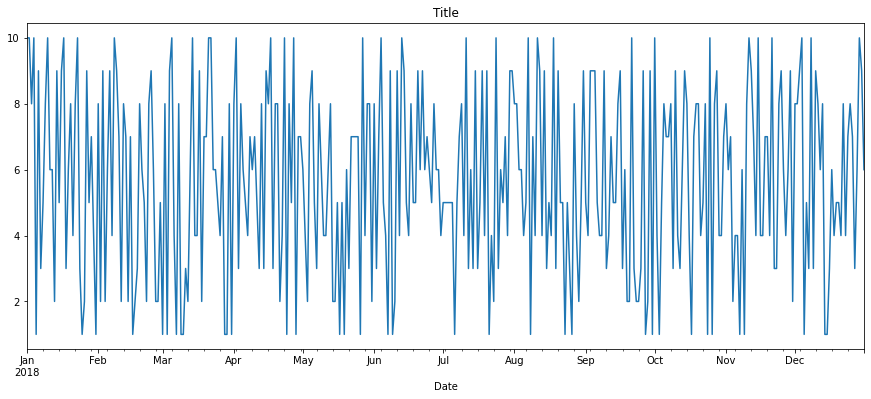

In [198]:
# Plot all values of the column
df['Values'].plot(figsize=(15,6), title = 'Title');

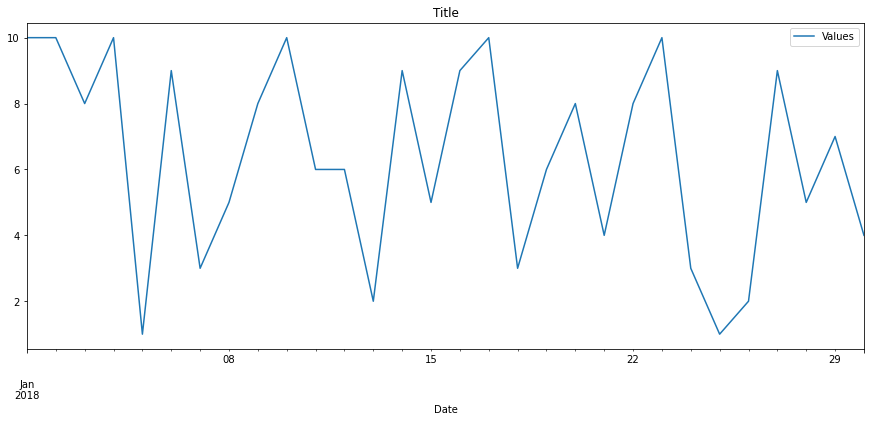

In [199]:
# Plot subset of data
df.loc['2018-01-01':'2018-01-30', ['Values']].plot(figsize=(15,6), title = 'Title');

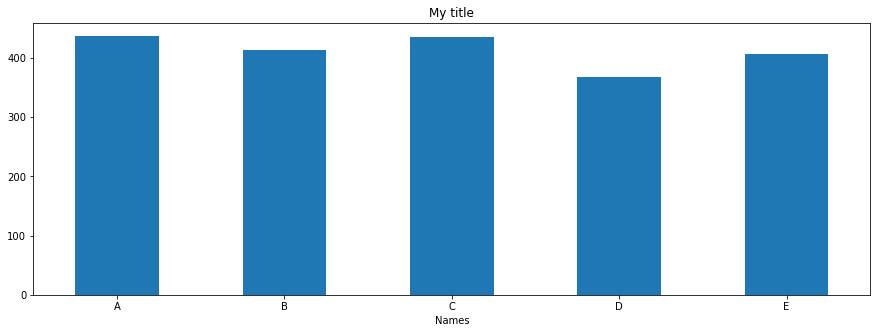

In [200]:
# Groupby and plot a bar
df.groupby('Names')['Values'].sum().plot.bar(
    rot=0, figsize=(15,5), 
    title='My title');

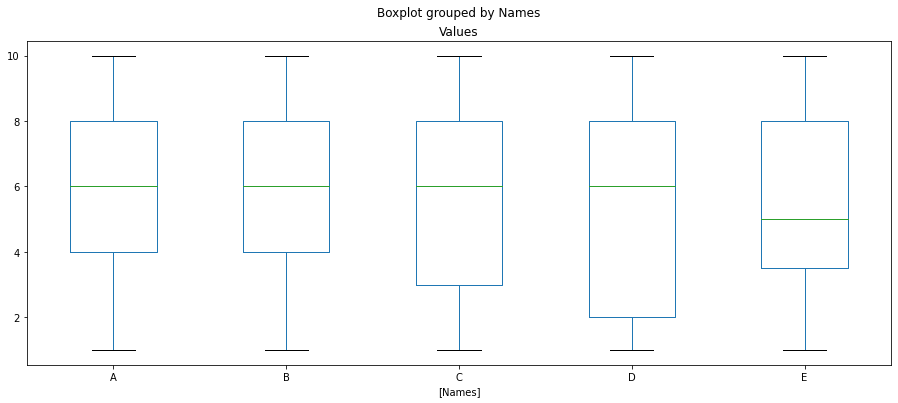

In [201]:
import warnings
warnings.filterwarnings('ignore')

# Groupby with boxplots
df[['Names', 'Values']].boxplot(by='Names', grid=False, figsize=(15,6));

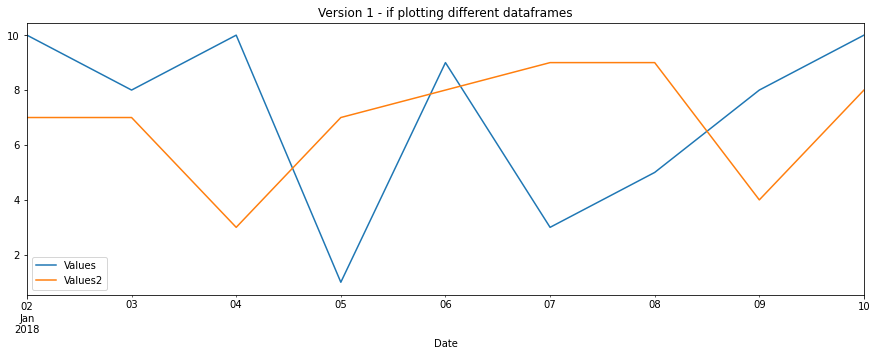

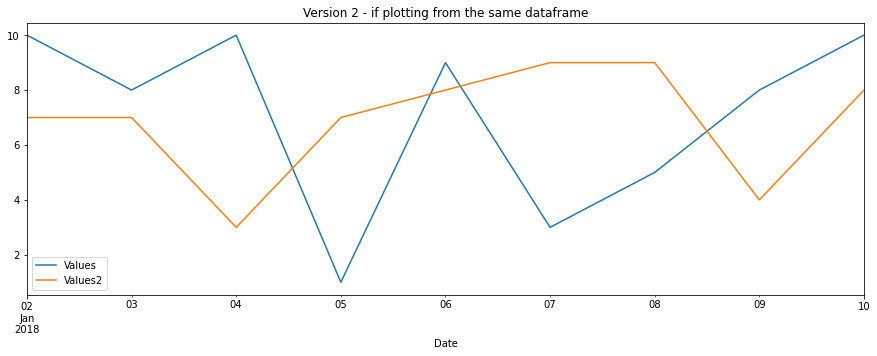

In [202]:
# Overlaping the data on plots for a subset of rows
df['Values'].iloc[1:10].plot(legend = True, figsize=(15,5), title = 'Version 1 - if plotting different dataframes');
df['Values2'].iloc[1:10].plot(legend = True, figsize=(15,5));

# OR

df[['Values', 'Values2']].iloc[1:10].plot(legend = True, figsize=(15,5), title = 'Version 2 - if plotting from the same dataframe');

## V . Pivot

In [203]:
df

,Names,Values,Values2
Date,,,
2018-01-01,B,10,1
2018-01-02,C,10,7
2018-01-03,C,8,7
2018-01-04,D,10,3
2018-01-05,E,1,7
...,...,...,...
2018-12-27,B,3,10
2018-12-28,B,6,1
2018-12-29,D,10,8


In [204]:
# Pivot
df2 = pd.pivot_table(df, values='Values', 
                         index=['Date'],
                         columns=['Names'], aggfunc=np.sum, fill_value=0)
df2

Names,A,B,C,D,E
Date,,,,,
2018-01-01,0,10,0,0,0
2018-01-02,0,0,10,0,0
2018-01-03,0,0,8,0,0
2018-01-04,0,0,0,10,0
2018-01-05,0,0,0,0,1
...,...,...,...,...,...
2018-12-27,0,3,0,0,0
2018-12-28,0,6,0,0,0
2018-12-29,0,0,0,10,0
